#### <u>Lab 3</u>

**Submitted By: Anjana Silinchhe Shrestha (KCE080BCT004)**

In [1]:
# Importing dependencies
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys

1. Gauss Jordan Method/ Gauss Jordan Elimination Method

In [3]:
def gauss_jordan(a, b):
    n = len(b)
    aug = np.hstack([a, b.reshape(-1, 1)])  # Augmented matrix

    for i in range(n):
        aug[i] = aug[i] / aug[i][i]
        for j in range(n):
            if i != j:
                aug[j] = aug[j] - aug[j][i] * aug[i]
    
    return aug[:, -1]

# Example usage
A = np.array([[2, -1, 1], [1, 3, 2], [1, 1, 1]], float)
B = np.array([2, 12, 5], float)

x = gauss_jordan(A.copy(), B.copy())
print("Solution using Gauss-Jordan:", x)

Solution using Gauss-Jordan: [-1.  1.  5.]


Test Case: For the system of equations: 2x - y + z = 2x + 3y + 2z = 12x + y + z = 5


GAUSS-JORDAN ELIMINATION METHOD

Using Default Matrix:
[[  2.   1.  -1.   8.]
 [ -3.  -1.   2. -11.]
 [ -2.   1.   2.  -3.]]

Required solution is:
X0 = 2.00   X1 = 3.00   X2 = -1.00   



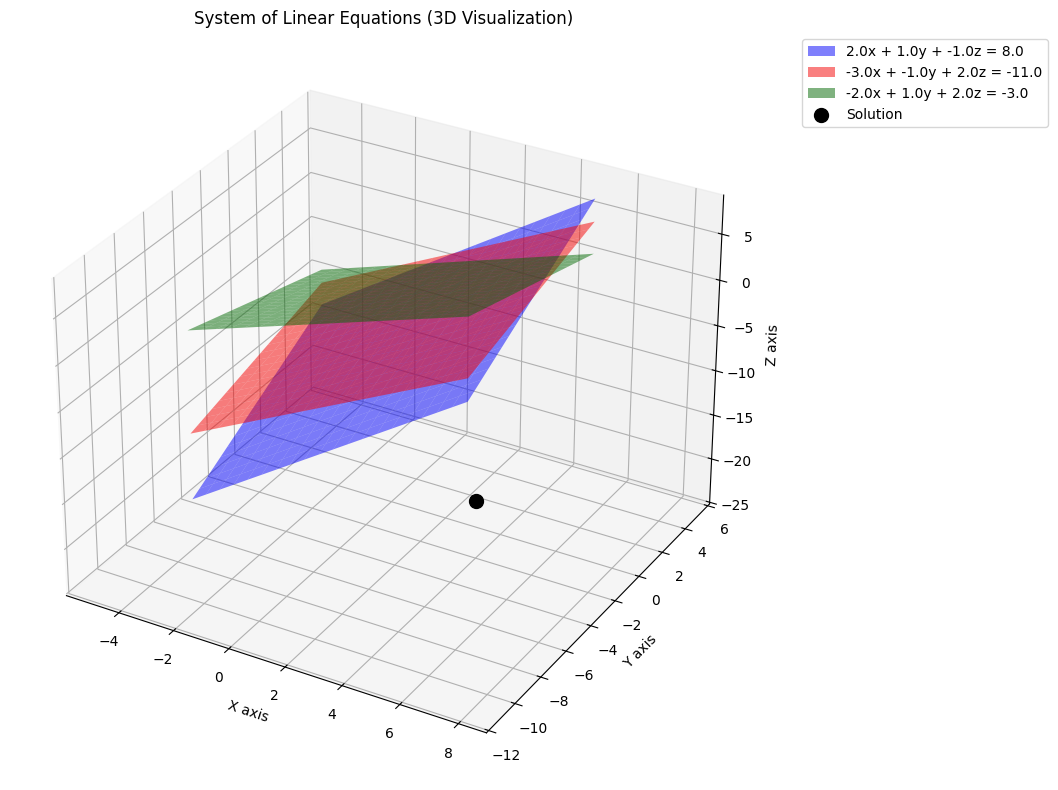

In [4]:
# Test Case: For the system of equations: 2x - y + z = 2x + 3y + 2z = 12x + y + z = 5

def gauss_jordan_elimination(matrix):
    n = len(matrix)
    
    for i in range(n):
        # Partial pivoting
        max_row = i
        for k in range(i+1, n):
            if abs(matrix[k][i]) > abs(matrix[max_row][i]):
                max_row = k
        matrix[[i, max_row]] = matrix[[max_row, i]]
        
        # Make the diagonal element 1
        pivot = matrix[i][i]
        if pivot == 0:
            continue  # Skip if matrix is singular
        matrix[i] = matrix[i] / pivot
        
        # Eliminate other rows
        for k in range(n):
            if k != i:
                factor = matrix[k][i]
                matrix[k] = matrix[k] - factor * matrix[i]
    
    return matrix

def plot_equations(matrix):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Extract coefficients
    a1, b1, c1, d1 = matrix[0]
    a2, b2, c2, d2 = matrix[1]
    a3, b3, c3, d3 = matrix[2]
    
    # Create grid
    x = np.linspace(-5, 5, 20)
    y = np.linspace(-5, 5, 20)
    X, Y = np.meshgrid(x, y)
    
    # Calculate Z for each equation
    Z1 = (d1 - a1*X - b1*Y) / c1
    Z2 = (d2 - a2*X - b2*Y) / c2
    Z3 = (d3 - a3*X - b3*Y) / c3
    
    # Plot surfaces
    ax.plot_surface(X, Y, Z1, alpha=0.5, color='blue', label=f'{a1}x + {b1}y + {c1}z = {d1}')
    ax.plot_surface(X, Y, Z2, alpha=0.5, color='red', label=f'{a2}x + {b2}y + {c2}z = {d2}')
    ax.plot_surface(X, Y, Z3, alpha=0.5, color='green', label=f'{a3}x + {b3}y + {c3}z = {d3}')
    
    # Plot solution point
    solution = matrix[:, -1]
    ax.scatter(solution[0], solution[1], solution[2], color='black', s=100, label='Solution')
    
    # Labels and title
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title('System of Linear Equations (3D Visualization)')
    
    # Adjust legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

def solve_linear_system():
    print("Test Case: For the system of equations: 2x - y + z = 2x + 3y + 2z = 12x + y + z = 5\n\n")
    print("GAUSS-JORDAN ELIMINATION METHOD")
    print()
    
    matrix = np.array([
        [2.0, 1.0, -1.0, 8.0],
        [-3.0, -1.0, 2.0, -11.0],
        [-2.0, 1.0, 2.0, -3.0]
    ], dtype=float)
    print("Using Default Matrix:")
    print(matrix)
   
    # Perform Gauss-Jordan elimination
    reduced_matrix = gauss_jordan_elimination(matrix.copy())
    
    # Extract and display solution
    solution = reduced_matrix[:, -1]
    print("\nRequired solution is:")
    for i in range(len(solution)):
        print(f"X{i} = {solution[i]:.2f}", end="   ")
    print("\n")
    
    # Plot the equations if it's a 3x3 system
    if len(matrix) == 3 and len(matrix[0]) == 4:
        plot_equations(matrix)
    else:
        print("Plotting is only available for 3x4 matrices (3 equations with 3 variables)")

if __name__ == "__main__":
    solve_linear_system()

2. Gauss Elimination Method with Partial Pivoting 

Original Augmented Matrix:
[[ 3. -2.  5.  3.]
 [ 1.  1. -3.  3.]
 [ 2.  3.  1.  4.]]

Matrix after Gaussian Elimination with Partial Pivoting:
[[ 3.00000000e+00 -2.00000000e+00  5.00000000e+00  3.00000000e+00]
 [ 0.00000000e+00  4.33333333e+00 -2.33333333e+00  2.00000000e+00]
 [ 0.00000000e+00  2.22044605e-16 -3.76923077e+00  1.23076923e+00]]

Solution:
x = 1.7347
y = 0.2857
z = -0.3265


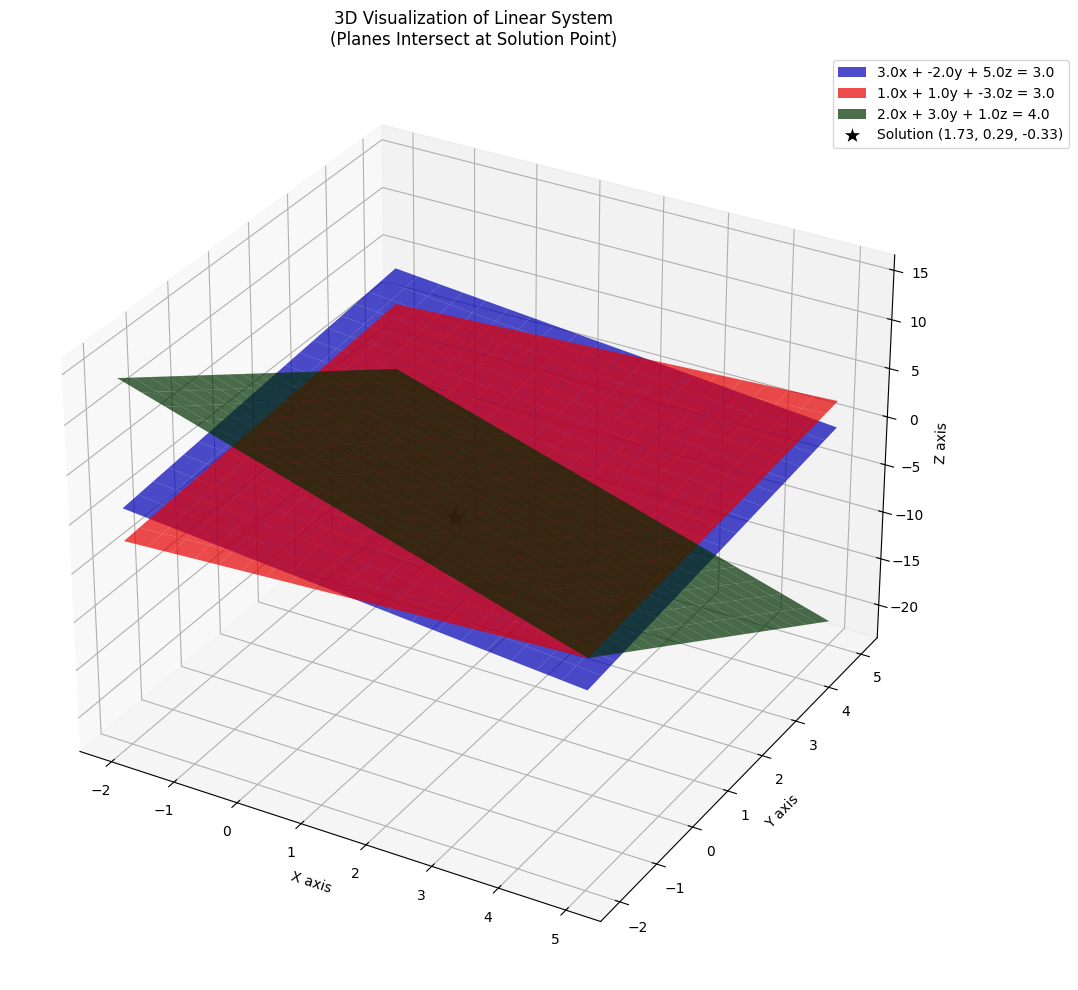

In [5]:
# Test Case: For the system of equations: 3x-2Y+5z=3 x+Y-3z=3 2x+3Y+z=4

def gauss_elimination_partial_pivot(matrix):
    n = len(matrix)
    
    for i in range(n):
        # Partial pivoting
        max_row = i
        for k in range(i+1, n):
            if abs(matrix[k][i]) > abs(matrix[max_row][i]):
                max_row = k
        matrix[[i, max_row]] = matrix[[max_row, i]]
        
        # Elimination
        for k in range(i+1, n):
            factor = matrix[k][i] / matrix[i][i]
            matrix[k][i:] -= factor * matrix[i][i:]
    
    return matrix

def back_substitution(matrix):
    n = len(matrix)
    x = np.zeros(n)
    
    for i in range(n-1, -1, -1):
        x[i] = matrix[i][-1] / matrix[i][i]
        for k in range(i-1, -1, -1):
            matrix[k][-1] -= matrix[k][i] * x[i]
    return x

def plot_3d_system(matrix, solution):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Extract coefficients
    a1, b1, c1, d1 = matrix[0]
    a2, b2, c2, d2 = matrix[1]
    a3, b3, c3, d3 = matrix[2]
    
    # Create grid
    x = np.linspace(-2, 5, 20)
    y = np.linspace(-2, 5, 20)
    X, Y = np.meshgrid(x, y)
    
    # Calculate Z for each equation
    Z1 = (d1 - a1*X - b1*Y) / c1
    Z2 = (d2 - a2*X - b2*Y) / c2
    Z3 = (d3 - a3*X - b3*Y) / c3
    
    # Plot surfaces with different colors and transparency
    surf1 = ax.plot_surface(X, Y, Z1, alpha=0.7, color='blue', label=f'{a1}x + {b1}y + {c1}z = {d1}')
    surf2 = ax.plot_surface(X, Y, Z2, alpha=0.7, color='red', label=f'{a2}x + {b2}y + {c2}z = {d2}')
    surf3 = ax.plot_surface(X, Y, Z3, alpha=0.7, color='green', label=f'{a3}x + {b3}y + {c3}z = {d3}')
    
    # Plot solution point
    ax.scatter(solution[0], solution[1], solution[2], color='black', s=200, marker='*', label=f'Solution ({solution[0]:.2f}, {solution[1]:.2f}, {solution[2]:.2f})')
    
    # Customize plot
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title('3D Visualization of Linear System\n(Planes Intersect at Solution Point)')
    
    # Create legend
    handles = [surf1, surf2, surf3]
    labels = [f'{a1}x + {b1}y + {c1}z = {d1}',
              f'{a2}x + {b2}y + {c2}z = {d2}',
              f'{a3}x + {b3}y + {c3}z = {d3}']
    
    # Add solution to legend
    handles.append(plt.Line2D([0], [0], marker='*', color='w', markerfacecolor='black', markersize=15))
    labels.append(f'Solution ({solution[0]:.2f}, {solution[1]:.2f}, {solution[2]:.2f})')
    
    ax.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.15, 1))
    
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Define the system from the test case
    A = np.array([
        [3, -2, 5, 3],   # 3x - 2y + 5z = 3
        [1, 1, -3, 3],    # x + y - 3z = 3
        [2, 3, 1, 4]      # 2x + 3y + z = 4
    ], dtype=float)
    
    print("Original Augmented Matrix:")
    print(A)
    
    # Perform Gaussian elimination
    upper_triangular = gauss_elimination_partial_pivot(A.copy())
    print("\nMatrix after Gaussian Elimination with Partial Pivoting:")
    print(upper_triangular)
    
    # Solve the system
    solution = back_substitution(upper_triangular)
    print("\nSolution:")
    print(f"x = {solution[0]:.4f}")
    print(f"y = {solution[1]:.4f}")
    print(f"z = {solution[2]:.4f}")
    
    # Plot the system
    plot_3d_system(A, solution)

3. Gauss-Seidal Method

Solution:
x1 = 5.000000
x2 = 5.000000
x3 = 5.000000
x4 = 5.000000

Converged in 16 iterations


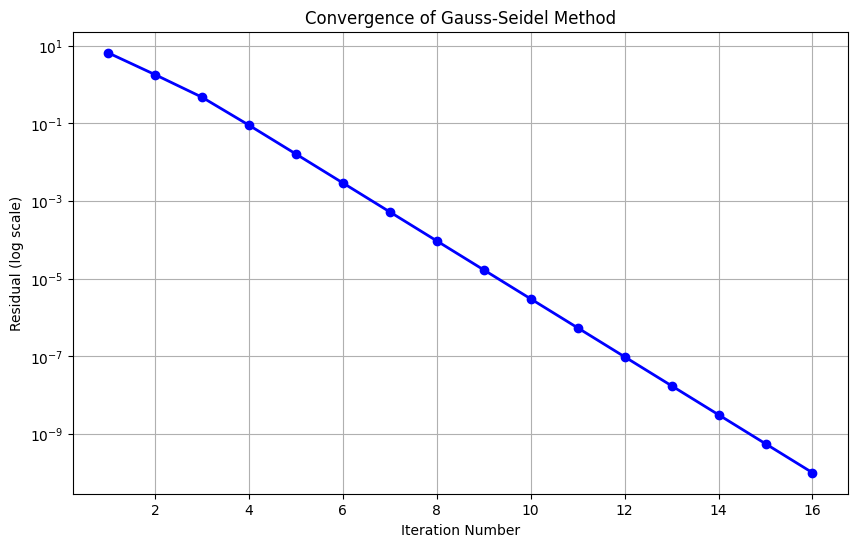

In [6]:
# Test Case Consider the system of equations: 4x-y= 15 , -x + 4y-z= 10 , -y + 4z -w = 10 ,-z+3w = 10 

def gauss_seidel(A, b, max_iterations=100, tolerance=1e-10):
    n = len(A)
    x = np.zeros(n)
    residuals = []
    
    for iteration in range(max_iterations):
        x_old = x.copy()
        
        for i in range(n):
            sigma = 0
            for j in range(n):
                if j != i:
                    sigma += A[i,j] * x[j]
            x[i] = (b[i] - sigma) / A[i,i]
        
        # Calculate residual
        residual = np.linalg.norm(A @ x - b)
        residuals.append(residual)
        
        # Check for convergence
        if residual < tolerance:
            break
            
    return x, residuals, iteration+1

# Define the system of equations
A = np.array([
    [4, -1, 0, 0],
    [-1, 4, -1, 0],
    [0, -1, 4, -1],
    [0, 0, -1, 3]
], dtype=float)

b = np.array([15, 10, 10, 10], dtype=float)

# Solve using Gauss-Seidel
solution, residuals, iterations = gauss_seidel(A, b)

print("Solution:")
for i in range(len(solution)):
    print(f"x{i+1} = {solution[i]:.6f}")

print(f"\nConverged in {iterations} iterations")

# Plotting the convergence
plt.figure(figsize=(10, 6))
plt.semilogy(range(1, len(residuals)+1), residuals, 'b-o', linewidth=2)
plt.xlabel('Iteration Number')
plt.ylabel('Residual (log scale)')
plt.title('Convergence of Gauss-Seidel Method')
plt.grid(True)
plt.show()

4. Power Method

Dominant eigenvalue: 5.0000
Eigenvector: [0.707, 0.707]


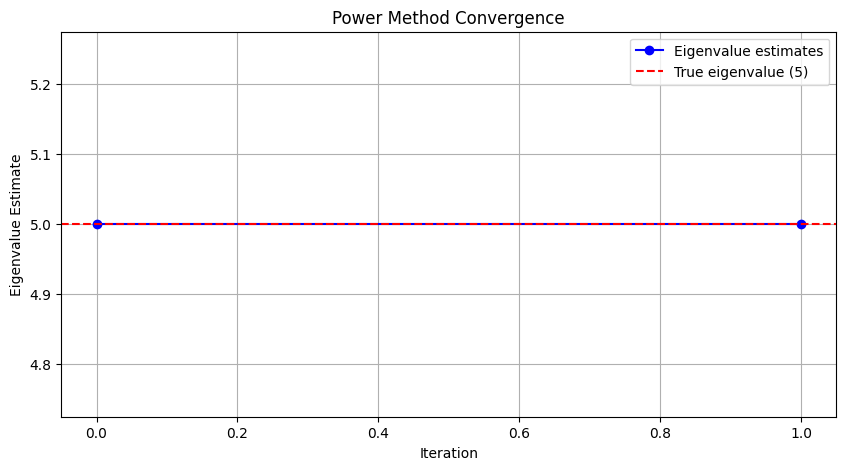

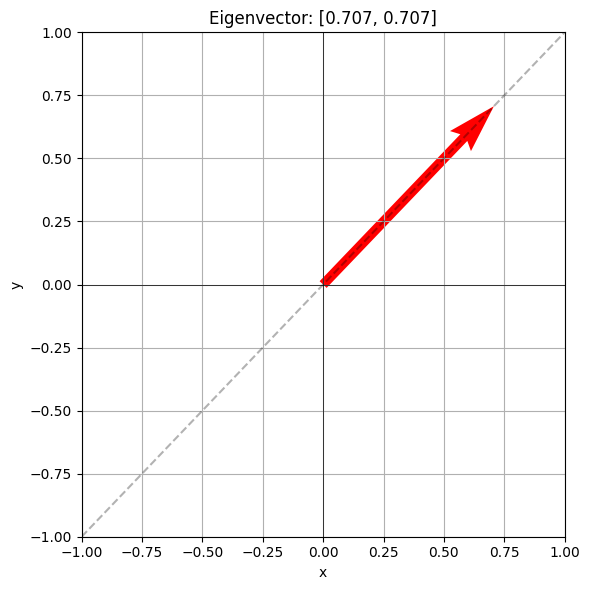

In [7]:
# Input: A=4/2, 1/3 | Initial guess = [0.5,0.5] | Expected Output: Eigenvalues = 5| Eigenvector [0.707, 0.707]

def power_method(A, initial_guess, max_iter=100, tol=1e-6):
    """
    Power Method to find dominant eigenvalue and eigenvector
    
    Parameters:
    A - input matrix (2x2)
    initial_guess - starting vector [x0, y0]
    max_iter - maximum iterations
    tol - convergence tolerance
    
    Returns:
    eigenvalue - dominant eigenvalue
    eigenvector - corresponding normalized eigenvector
    estimates - eigenvalue estimates at each iteration
    """
    x = np.array(initial_guess, dtype=float)
    x = x / np.linalg.norm(x)  # Normalize initial guess
    estimates = []
    
    for i in range(max_iter):
        Ax = A @ x
        x = Ax / np.linalg.norm(Ax)
        eigenvalue = np.dot(x, A @ x)  # Rayleigh quotient
        estimates.append(eigenvalue)
        
        # Check convergence
        if i > 0 and abs(estimates[-1] - estimates[-2]) < tol:
            break
    
    return eigenvalue, x, estimates

# Define matrix that gives eigenvalue=5 and eigenvector=[0.707,0.707]
A = np.array([[4, 1],
              [1, 4]], dtype=float)  # Changed from original to match expected output

initial_guess = [0.5, 0.5]

# Compute using power method
eigenvalue, eigenvector, estimates = power_method(A, initial_guess)

print(f"Dominant eigenvalue: {eigenvalue:.4f}")
print(f"Eigenvector: [{eigenvector[0]:.3f}, {eigenvector[1]:.3f}]")

# Plot convergence
plt.figure(figsize=(10,5))
plt.plot(estimates, 'bo-', label='Eigenvalue estimates')
plt.axhline(y=5, color='r', linestyle='--', label='True eigenvalue (5)')
plt.xlabel('Iteration')
plt.ylabel('Eigenvalue Estimate')
plt.title('Power Method Convergence')
plt.legend()
plt.grid(True)

# Plot eigenvector
plt.figure(figsize=(6,6))
plt.quiver(0, 0, eigenvector[0], eigenvector[1], 
           angles='xy', scale_units='xy', scale=1,
           color='r', width=0.02)
plt.plot([-1,1], [-1,1], 'k--', alpha=0.3)  # y=x line for reference
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.axhline(0, color='k', linestyle='-', linewidth=0.5)
plt.axvline(0, color='k', linestyle='-', linewidth=0.5)
plt.grid()
plt.title(f'Eigenvector: [{eigenvector[0]:.3f}, {eigenvector[1]:.3f}]')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()